### Import Libraries

In [4]:
import numpy as np
import tensorflow_probability as tfp
import matplotlib.pyplot as plt

### Define Priors
- Preparing Priors Probability Distribution

In [11]:
# Define prior (Uniform distribution for probability of heads)
prior = tfp.distributions.Uniform(low=0., high=1.)
print("prior:",prior)

prior: tfp.distributions.Uniform("Uniform", batch_shape=[], event_shape=[], dtype=float32)


We believe that all probability values during tosses have equal chances. So uniform distribution.

### Define Likelihood Function 
- Preparing Likelihood Probability Distribution

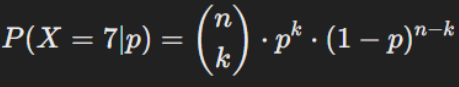
- This is the likelihood formula for a given probability p in a binomial distribution. It calculates the probability of observing exactly k successes (e.g., 7 heads) in n trials (e.g., 10 tosses).

In [12]:
# Define likelihood function (Binomial: Observed Data--> 7 heads out of 10 tosses)
def likelihood_fn(p):
    return tfp.distributions.Binomial(total_count=10, probs=p).prob(7).numpy()

### Define Posterior

In [7]:
# Define posterior (using Bayes' rule approximation)
p_values = np.linspace(0, 1, 100)
print("p_values:", p_values)

p_values: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.888888

In [9]:
# Assinging Probabilitys to Priors using Uniform Distribution
prior_values = prior.prob(p_values).numpy()
print("prior_values:",prior_values)

prior_values: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


The prior_values being all 1 means we assume a uniform prior, indicating that all probabilities 
p (from 0 to 1) have an equal chance of being true, i.e., no bias is assumed initially during Toss.

In [10]:
# Checking Likelihood for all above priors(probability values) in tossing a coin
likelihood_values = np.array([likelihood_fn(p) for p in p_values])
print("likelihood_values:",likelihood_values)

likelihood_values: [0.00000000e+00 1.24884209e-12 1.55008128e-10 2.56738963e-09
 1.86388904e-08 8.60999484e-08 2.98769939e-07 8.50901055e-07
 2.09692736e-06 4.62651947e-06 9.35404210e-06 1.76208199e-05
 3.13080328e-05 5.29575787e-05 8.58978566e-05 1.34371131e-04
 2.03658929e-04 3.00201810e-04 4.31709785e-04 6.07259710e-04
 8.37376066e-04 1.13409170e-03 1.51098531e-03 1.98319276e-03
 2.56738963e-03 3.28174264e-03 4.14582834e-03 5.18051742e-03
 6.40782387e-03 7.85071850e-03 9.53290698e-03 1.14785729e-02
 1.37120869e-02 1.62576843e-02 1.91391122e-02 2.23792502e-02
 2.59997070e-02 3.00203974e-02 3.44591040e-02 3.93310282e-02
 4.46483356e-02 5.04197024e-02 5.66498677e-02 6.33391995e-02
 7.04832796e-02 7.80725161e-02 8.60917886e-02 9.45201357e-02
 1.03330490e-01 1.12489471e-01 1.21957235e-01 1.31687407e-01
 1.41627073e-01 1.51716873e-01 1.61891169e-01 1.72078319e-01
 1.82201042e-01 1.92176890e-01 2.01918832e-01 2.11335938e-01
 2.20334180e-01 2.28817341e-01 2.36688032e-01 2.43848814e-01
 2.50

- Likelihood Calculation: tfp.distributions.Binomial(total_count=10, probs=p).prob(7).numpy() computes the probability of observing exactly 7 heads (likelihood) given a specific probability p.
- We get more likelihood value for biased probability i.e., 0.7 because only in biased probability belief only we get 7 heads out of 10 tosses. Where in fair probability 50%~0.5 7 heads out of 10 tosses are less likely, so we get less likelihood value. 
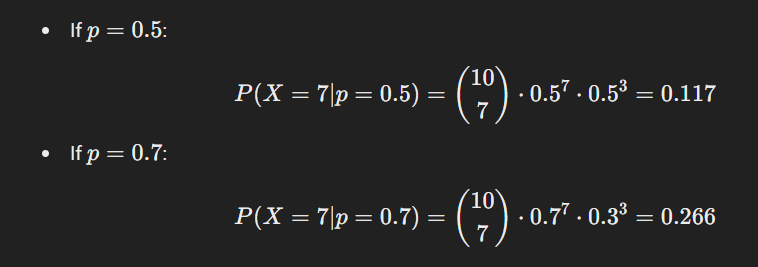

> **Note**: in observed data there is biased situation of being 7 heads out of 10 tosses. So biased probability belief about Tossing would be True and get higher likelihood rather than balanced probability belief about Tossing, which results in lesser Likelihood.

In [13]:
posterior_values = prior_values * likelihood_values
print("posterior_values:",posterior_values)

posterior_values: [0.00000000e+00 1.24884209e-12 1.55008128e-10 2.56738963e-09
 1.86388904e-08 8.60999484e-08 2.98769939e-07 8.50901055e-07
 2.09692736e-06 4.62651947e-06 9.35404210e-06 1.76208199e-05
 3.13080328e-05 5.29575787e-05 8.58978566e-05 1.34371131e-04
 2.03658929e-04 3.00201810e-04 4.31709785e-04 6.07259710e-04
 8.37376066e-04 1.13409170e-03 1.51098531e-03 1.98319276e-03
 2.56738963e-03 3.28174264e-03 4.14582834e-03 5.18051742e-03
 6.40782387e-03 7.85071850e-03 9.53290698e-03 1.14785729e-02
 1.37120869e-02 1.62576843e-02 1.91391122e-02 2.23792502e-02
 2.59997070e-02 3.00203974e-02 3.44591040e-02 3.93310282e-02
 4.46483356e-02 5.04197024e-02 5.66498677e-02 6.33391995e-02
 7.04832796e-02 7.80725161e-02 8.60917886e-02 9.45201357e-02
 1.03330490e-01 1.12489471e-01 1.21957235e-01 1.31687407e-01
 1.41627073e-01 1.51716873e-01 1.61891169e-01 1.72078319e-01
 1.82201042e-01 1.92176890e-01 2.01918832e-01 2.11335938e-01
 2.20334180e-01 2.28817341e-01 2.36688032e-01 2.43848814e-01
 2.502

- The formula posterior_values = prior_values × likelihood_values
posterior_values=prior_values×likelihood_values updates your belief about p. It combines your initial belief (prior) with the evidence from data (likelihood).

- In simple terms: Each p (belief) is weighted by how likely the observed data is under that p, resulting in the posterior values, which represent your updated belief.

In [14]:
posterior_values /= posterior_values.sum()  # Normalize
print("posterior_values:",posterior_values)

posterior_values: [0.00000000e+00 1.38760216e-13 1.72231234e-11 2.85265481e-10
 2.07098759e-09 9.56665984e-09 3.31966561e-08 9.45445509e-08
 2.32991902e-07 5.14057660e-07 1.03933789e-06 1.95786866e-06
 3.47866991e-06 5.88417473e-06 9.54420519e-06 1.49301239e-05
 2.26287673e-05 3.33557529e-05 4.79677484e-05 6.74732934e-05
 9.30417745e-05 1.26010174e-04 1.67887237e-04 2.20354726e-04
 2.85265481e-04 3.64638029e-04 4.60647541e-04 5.75612981e-04
 7.11980348e-04 8.72301956e-04 1.05921177e-03 1.27539684e-03
 1.52356504e-03 1.80640916e-03 2.12656778e-03 2.48658308e-03
 2.88885600e-03 3.33559933e-03 3.82878890e-03 4.37011375e-03
 4.96092561e-03 5.60218851e-03 6.29442902e-03 7.03768803e-03
 7.83147462e-03 8.67472302e-03 9.56575320e-03 1.05022361e-02
 1.14811643e-02 1.24988286e-02 1.35508024e-02 1.46319324e-02
 1.57363396e-02 1.68574284e-02 1.79879057e-02 1.91198111e-02
 2.02445579e-02 2.13529853e-02 2.24354232e-02 2.34817682e-02
 2.44815728e-02 2.54241461e-02 2.62986672e-02 2.70943096e-02
 2.780

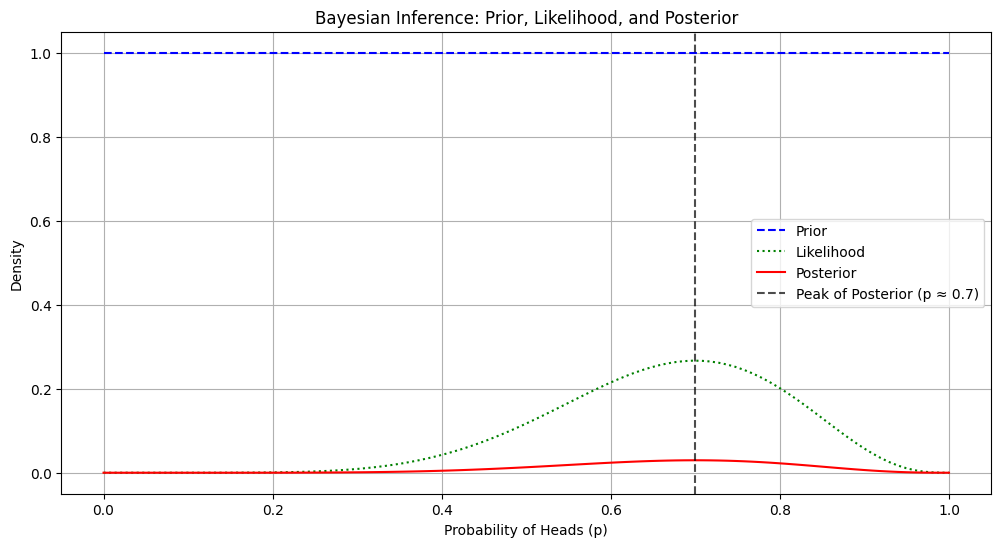

In [17]:
# Plot Prior, Likelihood, and Posterior distributions
plt.figure(figsize=(12, 6))
plt.plot(p_values, prior_values, label="Prior", linestyle="--", color="blue")
plt.plot(p_values, likelihood_values, label="Likelihood", linestyle=":", color="green")
plt.plot(p_values, posterior_values, label="Posterior", linestyle="-", color="red")
plt.axvline(0.7, color="black", linestyle="--", alpha=0.7, label="Peak of Posterior (p ≈ 0.7)")

# Annotations and Labels
plt.title("Bayesian Inference: Prior, Likelihood, and Posterior")
plt.xlabel("Probability of Heads (p)")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

**Observation**

- So this graph tells my initial belief, there all probability between 0 -> 1 have equal chance in tossing of 100 trails. Liklihood shows evidence for each probability between 0 -> 1 and having high likelihood for probability 0.7 because of observed 7 heads out of 10 tosses. This also seen in weighted priors * likelihood = posterior values distribution that 0.7 have high likelihood, so with this our belief should think probability 0.7 have high chance 

- `Prior`: All probabilities (0 to 1) were equally likely initially (uniform prior).
- `Likelihood`: Based on the data (7 heads in 10 tosses), probability p=0.7 explains the observation best.
- `Posterior`: Combining prior and likelihood, p=0.7 emerges as the most plausible belief after considering the evidence.